 Linear Regression

### Reading Data

In [1]:

import pandas as pd

file_path = r"hw1_q1_data.csv"
df = pd.read_csv(file_path)


In [2]:
df.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,2598
3,Charmander,78,128,108,0.16,0.10,25.3,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,1568


### (A-i) (5 points) Data exploration:

In [3]:
# Import required packages here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
def get_pearson_coeff(feature1, feature2='combat_point'):
  pearson_corr = df[feature1].corr(df[feature2])

  return np.round(pearson_corr,3)

In [ ]:
def plot_scatter(feature1, feature2):

  plt.figure(figsize=(4,4))
  plt.scatter(df[feature1],df[feature2], alpha=0.5)
  plt.title(f'Scatter plot {feature1} vs {feature2}')
  plt.xlabel(feature1)
  plt.ylabel(feature2)
  plt.xticks(rotation=90)
  plt.show()

In [5]:
df.head()

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.0,1079
1,Ivysaur,120,156,158,0.08,0.07,4.2,1643
2,Venusaur,160,198,200,0.04,0.05,1.7,2598
3,Charmander,78,128,108,0.16,0.10,25.3,962
4,Charmeleon,116,160,140,0.08,0.07,1.2,1568


In [6]:
features_list = []
coeff_list =[]

num_cols = [i for i in df.columns if (df[i].dtype!='object')&(i!='combat_point')]

for i in num_cols:
    corr = get_pearson_coeff(i)

    print(f'correlation coefficient {i} vs combat_point {corr}')

    coeff_list.append(corr)
    features_list.append(i)


data_exploration1_result = pd.DataFrame()
data_exploration1_result['feature'] = features_list
data_exploration1_result['corr'] = coeff_list
data_exploration1_result

correlation coefficient stamina vs combat_point 0.583
correlation coefficient attack_value vs combat_point 0.908
correlation coefficient defense_value vs combat_point 0.826
correlation coefficient capture_rate vs combat_point -0.743
correlation coefficient flee_rate vs combat_point -0.407
correlation coefficient spawn_chance vs combat_point -0.421


,feature,corr
0,stamina,0.583
1,attack_value,0.908
2,defense_value,0.826
3,capture_rate,-0.743
4,flee_rate,-0.407
5,spawn_chance,-0.421


### (A-ii) (5 points) Data exploration:

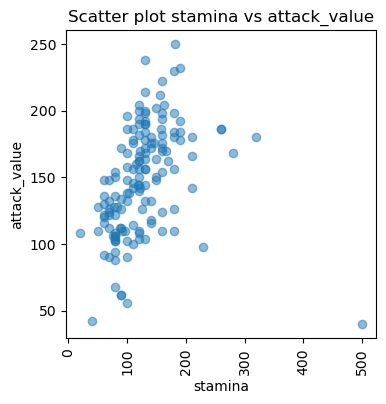

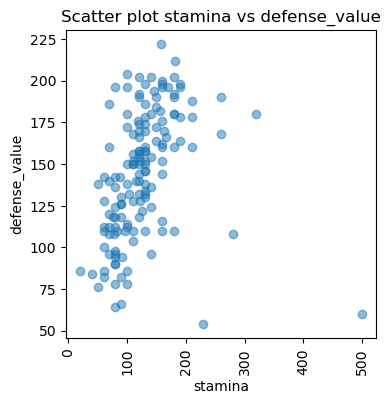

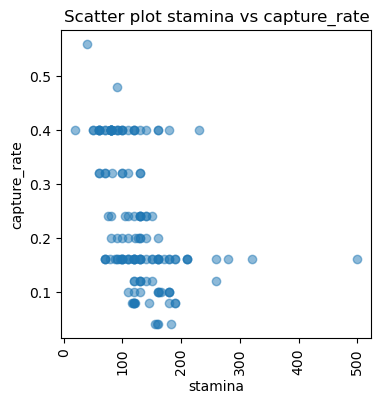

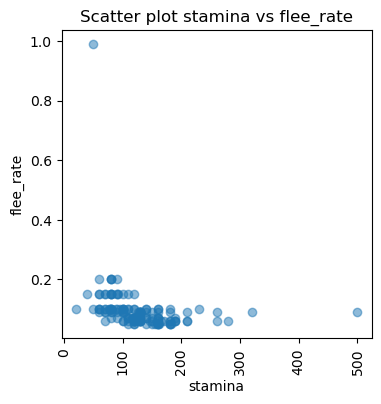

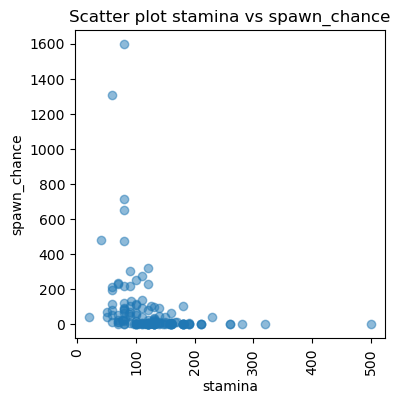

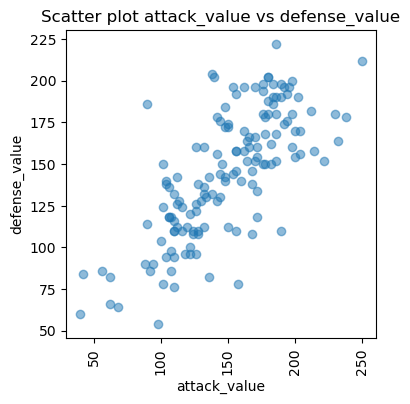

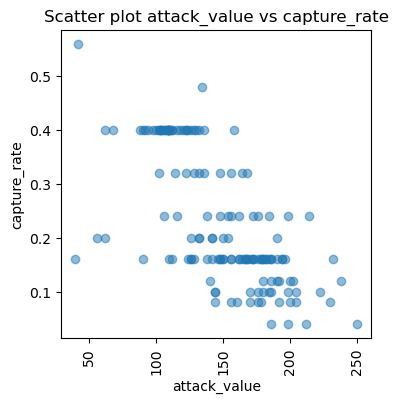

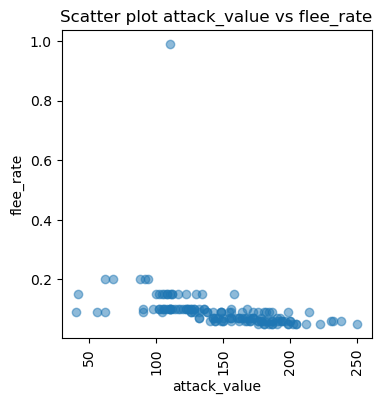

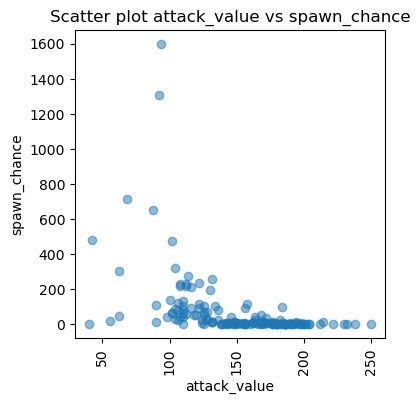

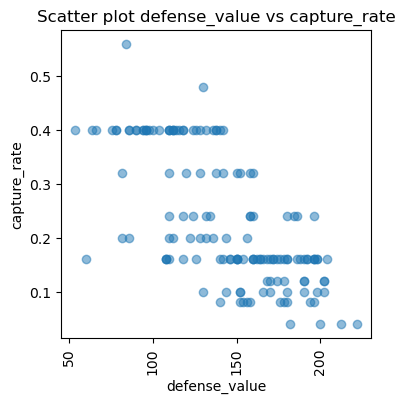

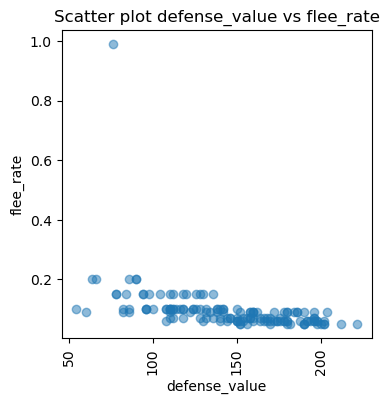

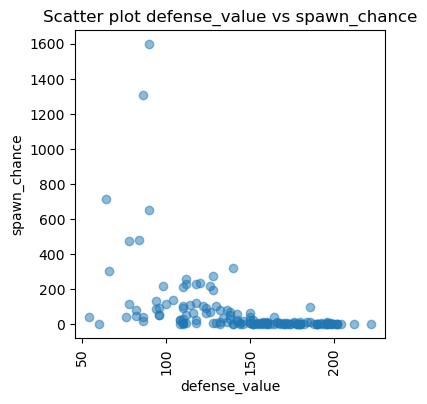

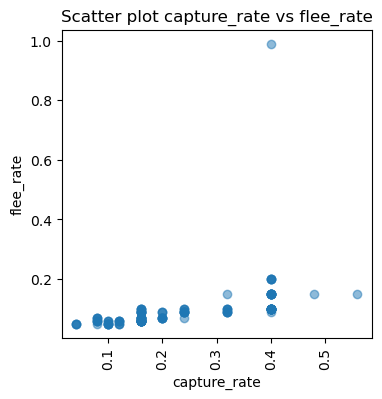

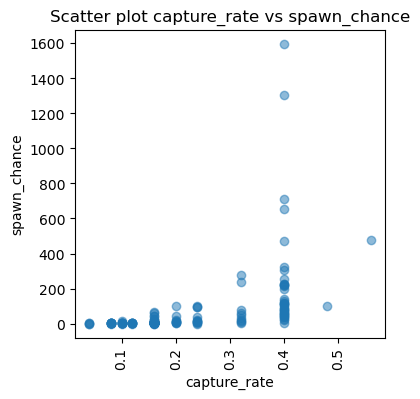

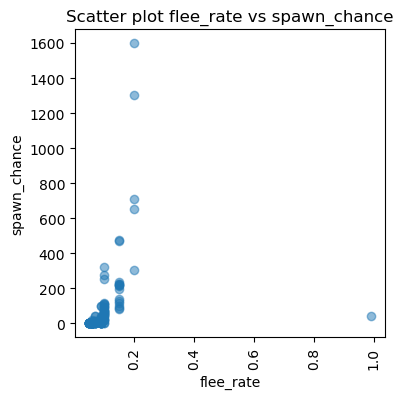

,Feature1,Feature2,corr_coeff
0,stamina,attack_value,0.303
1,stamina,defense_value,0.303
2,stamina,capture_rate,-0.447
3,stamina,flee_rate,-0.271
4,stamina,spawn_chance,-0.276
5,attack_value,defense_value,0.737
6,attack_value,capture_rate,-0.691
7,attack_value,flee_rate,-0.369
8,attack_value,spawn_chance,-0.433
9,defense_value,capture_rate,-0.697


In [7]:
n = len(features_list)
feature1_list = []
feature2_list = []
coeff_list = [] 

for i in range(0,n):
  for j in range(i+1, n):


    feature1_list.append(features_list[i])
    feature2_list.append(features_list[j])

    coeff_list.append(get_pearson_coeff(features_list[i],features_list[j]))
    plot_scatter(features_list[i],features_list[j])

data_exploration2_result = pd.DataFrame()
data_exploration2_result['Feature1'] = feature1_list
data_exploration2_result['Feature2'] = feature2_list
data_exploration2_result['corr_coeff'] = coeff_list
data_exploration2_result

In [8]:
# Import required packages here
import random

In [9]:
def get_predictions(X_train, y_train, X_test):
  coeffs = []

  ones_train = np.ones((len(X_train),1))
  x_train_with_const = np.hstack((ones_train, X_train))

  ones_test = np.ones((len(X_test), 1))
  x_test_with_const = np.hstack((ones_test, X_test))

  coeff = np.linalg.inv(x_train_with_const.T.dot(x_train_with_const)).dot(x_train_with_const.T).dot(y_train)
  coeffs.append(coeff)


  preds = x_test_with_const.dot(coeff)
  return preds, coeffs

In [10]:
# np.arange(len(data))

In [11]:
rss_scores = [] 
random.seed(23)
data = df.drop('name', axis=1)
data = data.values
random.shuffle(data)
np.random.seed(42)
index = np.arange(len(data))
np.random.shuffle(index)
split_indices = np.array_split(index, 5)

train1 = np.vstack((data[split_indices[0]],data[split_indices[1]], data[split_indices[2]], data[split_indices[3]]))
test1 = data[split_indices[4]]

train2 = np.vstack((data[split_indices[1]],data[split_indices[2]], data[split_indices[3]], data[split_indices[4]]))
test2 = data[split_indices[0]]

train3 = np.vstack((data[split_indices[2]],data[split_indices[3]], data[split_indices[4]], data[split_indices[0]]))
test3 = data[split_indices[1]]

train4 = np.vstack((data[split_indices[3]],data[split_indices[4]], data[split_indices[0]], data[split_indices[1]]))
test4 = data[split_indices[2]]

train5 = np.vstack((data[split_indices[4]],data[split_indices[0]], data[split_indices[1]], data[split_indices[2]]))
test5 = data[split_indices[3]]

train_list = [train1,train2,train3,train4,train5]
test_list = [test1, test2, test3, test4, test5]

def custom_mean_squared_error(actual_values, predicted_values):
  if len(actual_values) != len(predicted_values):
    raise ValueError("Input lists must have the same length.")

  n = len(actual_values)
  squared_errors = [(actual_values[i] - predicted_values[i]) ** 2 for i in range(n)]
  mse = sum(squared_errors) / n
  return mse

def training_data_array(train):

    x = train[:,:-1]
    y = train[:,-1]

    return x, y
def testing_data_array(test):

    x = test[:,:-1]
    y = test[:,-1]

    return x, y
X_xtrain = []
y_ytrain = []
for i in train_list:

    x, y = training_data_array(i)

    X_xtrain.append(x)
    y_ytrain.append(y)

X_xtest = []
y_ytest = []

for i in test_list:
    x, y = testing_data_array(i)

    X_xtest.append(x)
    y_ytest.append(y)

    
    
prediction_list = []
coeff_list = []

validation_data = []

for i, (xtrain, ytrain, xtest, ytest) in enumerate(zip(X_xtrain, y_ytrain, X_xtest, y_ytest)):

    predictions, coefficients = get_predictions(xtrain, ytrain, xtest)

    rsme = np.sqrt(custom_mean_squared_error(predictions, ytest))

    prediction_list.append(predictions)
    coeff_list.append(coefficients)

    validation_data.append(ytest)

    rss_scores.append(rsme)


### YOUR CODE HERE
print(rss_scores)
average_rss = np.mean(rss_scores)
print(average_rss)

[78.05202874586035, 135.13464930797954, 77.0155994127259, 81.46910727654613, 72.59559633603534]
88.85339621582946


In [12]:
import itertools
import random
random.seed(21)

def train_test(X,y):

    split = int(len(X)*0.70)
    
    xtrain = X[:split,:]
    xtest = X[split:,:]
    ytrain = y[:split]
    ytest = y[split:]
    
    return xtrain, xtest, ytrain, ytest
    
    
cols_to_work = [i for i in df.columns if ((i!='name')&(i!='combat_point'))]
feature_combinations = []
count = 0
for i in cols_to_work:
    count+=1
    c = itertools.combinations(cols_to_work, count)
    
    feature_combinations.extend(c)
best_rss = []
for i in range(len(feature_combinations)):
    
    independent_feat = [i for i in feature_combinations[i]]
    
    X = df[independent_feat].values
    y = df['combat_point'].values
    random.seed(23)
    xtrain, xtest, ytrain, ytest = train_test(X,y)
    
    preds, coeff = get_predictions(xtrain, ytrain, xtest)
    
    rsme = np.sqrt(custom_mean_squared_error(preds, ytest))
    
    best_rss.append(rsme)

    
best_rss_score = np.argmin(best_rss)

print('best rss score is : {} '.format(best_rss[best_rss_score]))
print('best features combinations with target combat_point : {}'.format(feature_combinations[np.argmin(best_rss)]))


best rss score is : 227.22254936804327 
best features combinations with target combat_point : ('stamina', 'attack_value', 'defense_value', 'spawn_chance')


In [13]:
print(f'''We have performed experiment with {len(feature_combinations)} total combinations of our {len(cols_to_work)}
independent features and we are getting a list of {len(best_rss)} RSME values to get the minimum RSME value.
we are geting the minumn RSME {min(best_rss)} and the combination of independent and dependent features which
is giving the minimum RSME score is: {feature_combinations[np.argmin(best_rss)]}''')

We have performed experiment with 63 total combinations of our 6
independent features and we are getting a list of 63 RSME values to get the minimum RSME value.
we are geting the minumn RSME 227.22254936804327 and the combination of independent and dependent features which
is giving the minimum RSME score is: ('stamina', 'attack_value', 'defense_value', 'spawn_chance')


In [ ]:
End